# <center> UE22CS342AA2 - Data Analytics </center>

# <center> Worksheet 4a: Collaborative Filtering </center>

<center> Designed by Amritha GK, PESU-25 </center>

<br>

- Student name:Sanjana Boggaram J
- SRN:PES1UG22CS524
- Section:I

Assume there exists a parallel universe and you are a Data Analyst intern at Parallel Earth Amazon. The company wants to test product recommendations and improve their product catalogue. For this exercise, you are tasked with the analysis of User Ratings for Health and Personal Care Products.



# Details of the dataset:

### Columns in this dataset:

- 'sl': serial number of records

- 'user_id': Unique identifier for users

- 'title': title of the review

- 'text': body of the review

- 'asin': Amazon Standard Identification Number (ASIN) is a ten-digit alphanumeric code that identifies products on Amazon. It's unique for each product and is assigned when you create a new product in Amazon's catalog.

- 'parent_asin': The abstraction of the variations is called the parent ASIN. It can't be purchased and hence is not associated with an offer.

- 'rating': Product rating (out of 5)

- 'timestamp': In milliseconds

- 'helpful_vote': Interactions of other users with this review

- 'verified_purchase': (True or False) Amazon has verified that the person writing the review purchased the product from Amazon, and didn't receive the product at a discount.



## Some conceptual information:

### Utility Matrix

This is an m x n matrix (m users, n items) that consists the rating / preference of each user for each item.

It is usually quite sparse as the rating values are usually present for very few user-item pairs.



### Neighborhood-based methods

The main idea with neighborhood-based methods is to leverage either user-user similarity or item-item similarity to make recommendations. These methods assume that similar users tend to have similar behaviors when rating items.

There are mainly two types:



1. **User-based collaborative filtering**: based on similarity between users.

2. **Item-based collaborative filtering**: based on similarity between items.



### Matrix factorization/decomposition

The utility matrix can be represented as a product of two smaller matrices, say U and V, representing users and items respectively.

## Install the required packages

In [2]:
install.packages("recommenderlab")

install.packages("tidyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Load the required packages

In [3]:
library(dplyr)
library(tidyr)   
library(recommenderlab)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: arules


Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: proxy


Attaching package: ‘proxy’


The following object is masked from ‘package:Matrix’:

    as.matrix


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix


Registered S3 methods overwritten by 'registry':
  method               from 
  print.registry_field proxy
  print.registry_entry proxy



## Load and create dataframe

In [4]:
# Your code here
data <- read.csv("/kaggle/input/health-and-personal-care-dataset/Worksheet-4a_Health_And_Personal_Care_Dataset.csv")
head(data)

,X,user_id,title,text,asin,parent_asin,rating,timestamp,helpful_vote,verified_purchase
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>
1,2809,AE23ZBUF2YVBQPH2NN6F5XSA3QYQ,The Soap Petals Are A Fun Addition,"I'm using to purchasing bath bombs for nearly $6-10 a bomb at major bath and spa stores, so these bombs are $18 at the time of review are an amazing price. The scent, the size, the colors, and the extra soap petals are a steal! The bombs are a great size. They fizz, spin, and float for quite some time, longer than usual bombs. There is even a very large heart shaped bomb that lasts forever. The scents vary and are not too perfume like nor too fake smelling. They are relaxing and calming. I love that it includes the plastic piece to open the bombs easier too. The box itself has a bunch of flower petal soaps inside. These petals are fun for floating and using the soap to wash with after. You can't go wrong with this box of spa bath bombs.",B08D93ZSWY,B08D93ZSWY,5,1.617386e+12,1,False
2,2549,AE23ZBUF2YVBQPH2NN6F5XSA3QYQ,Add More Water Than Suggested,"We live in the south. You need all the help when you live in the south in the summer. The humidity and heat are brutal. If you don't beat the heat, you'll need these. The trick I found to these is to do a little more than 32oz of water. I do 4oz with warm water for the powder to dissolve and then I had 30 oz of cold water and ice cubes and shake again. These tastes much better cold, but the powder dissolves easier when it's mixed in warm water initially.<br /><br />The orange tastes good. It is a bit sweeter than I would like, but sweet is better than salty and the sweetness gets better when you add those extra couple oz of water. It doesn't taste like the fake sugar thankfully. And it doesn't taste like salt which I half expected like other fluid replacement and electrolyte mixes.<br /><br />They come in an easy to keep package. Grab what you need and stick it back in the closet. These are even good for school sports since you can hydrate a whole team for just over $1 a piece. Still cheaper than name brand.",B09GL3RDTD,B09GL3RDTD,4,1.637514e+12,0,False
3,2593,AE23ZBUF2YVBQPH2NN6F5XSA3QYQ,Not very comfortable.,"This is difficult to give a good review because there are way more negatives than positives. I mean, it's great the packaging is easy to open, but it is not enough to make me convince you to purchase these. I am not flat footed, but I also don't have a high arch, yet I'm not neutral either. I wear other insoles of the same style comfortably. These are not comparable.<br /><br />Pros<br />-Size 12 needs no cutting.<br />-Easy to remove from the packaging.<br /><br />Cons<br />-Flat (It says its the natural arch height, but these feel incredibly flat)<br />-Weird bubble in the middle (It feels really awkward)<br />-Narrow (If you have a wide foot, these will not work for you)<br />-Expensive ($36 for one pair at the time of review, for a no name brand)<br /><br />I would spend your money on a name brand insole of the same style for a better price and better results. These are just not comfortable.",B08RD257KT,B08RD257KT,2,1.619570e+12,0,False
4,3280,AE23ZBUF2YVBQPH2NN6F5XSA3QYQ,Smells Intoxicating!,"Oh man these smell so good! Lemongrass is my favorite scent when it comes to essential oils and I enjoy looking for bath bombs and shower steamers that smell like strong lemongrass. The only thing I didn't care for was how difficult it was to actually open. Once I did get the bag open, I was hit with the lemongrass. The smell is literally intoxicating. If you place directly under the shower, they will dissolve quickly. I like placing one on one of the built in shelves where the water just splashes occasionally. I get a longer lasting steamer and the scent is closer to my face. These are $17, which puts them at almost $2 a piece, but this is okay because I've paid far more for shower steamers from name brand companies that weren't as strong. This is really a win for me

## Perform EDA and Preprocess the dataset to the required format

### 1 point

State some observations that you made after performing EDA.

Feel free to remove any columns you think are not necessary for the following problems.

Some hints to help you get started:
- Check the summary, number of rows and columns
- Remove null values and duplicates
- Obtain a subset of the dataset with the required columns only.
- Create the utility matrix


In [5]:
summary(data)
dim(data)
str(data)

       X          user_id             title               text          
 Min.   :   0   Length:4276        Length:4276        Length:4276       
 1st Qu.:1129   Class :character   Class :character   Class :character  
 Median :2278   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2284                                                           
 3rd Qu.:3437                                                           
 Max.   :4589                                                           
     asin           parent_asin            rating        timestamp        
 Length:4276        Length:4276        Min.   :1.000   Min.   :1.345e+12  
 Class :character   Class :character   1st Qu.:4.000   1st Qu.:1.593e+12  
 Mode  :character   Mode  :character   Median :5.000   Median :1.613e+12  
                                       Mean   :4.285   Mean   :1.610e+12  
                                       3rd Qu.:5.000   3rd Qu.:1.634e+12  
                                       

[1] 4276   10

'data.frame':	4276 obs. of  10 variables:
 $ X                : int  2809 2549 2593 3280 2178 397 711 1091 2302 3460 ...
 $ user_id          : chr  "AE23ZBUF2YVBQPH2NN6F5XSA3QYQ" "AE23ZBUF2YVBQPH2NN6F5XSA3QYQ" "AE23ZBUF2YVBQPH2NN6F5XSA3QYQ" "AE23ZBUF2YVBQPH2NN6F5XSA3QYQ" ...
 $ title            : chr  "The Soap Petals Are A Fun Addition" "Add More Water Than Suggested" "Not very comfortable." "Smells Intoxicating!" ...
 $ text             : chr  "I'm using to purchasing bath bombs for nearly $6-10 a bomb at major bath and spa stores, so these bombs are $18"| __truncated__ "We live in the south. You need all the help when you live in the south in the summer. The humidity and heat are"| __truncated__ "This is difficult to give a good review because there are way more negatives than positives. I mean, it's great"| __truncated__ "Oh man these smell so good! Lemongrass is my favorite scent when it comes to essential oils and I enjoy looking"| __truncated__ ...
 $ asin             : chr  "B0

In [6]:
# Removal of duplicates and NAN values
colSums(is.na(data))
data <- na.omit(data)
data <- data %>% distinct()

X           user_id             title              text 
                0                 0                 0                 0 
             asin       parent_asin            rating         timestamp 
                0                 0                 0                 0 
     helpful_vote verified_purchase 
                0                 0

In [7]:
# Converting timestamp to milliseconds
#selecting only relevant columns
data$timestamp <- as_datetime(data$timestamp / 1000)
data <- data %>% 
  select(user_id, asin, rating, helpful_vote, verified_purchase, timestamp)
data$helpful_vote <- ifelse(is.na(data$helpful_vote), 0, data$helpful_vote)

ERROR: Error in as_datetime(data$timestamp/1000): could not find function "as_datetime"


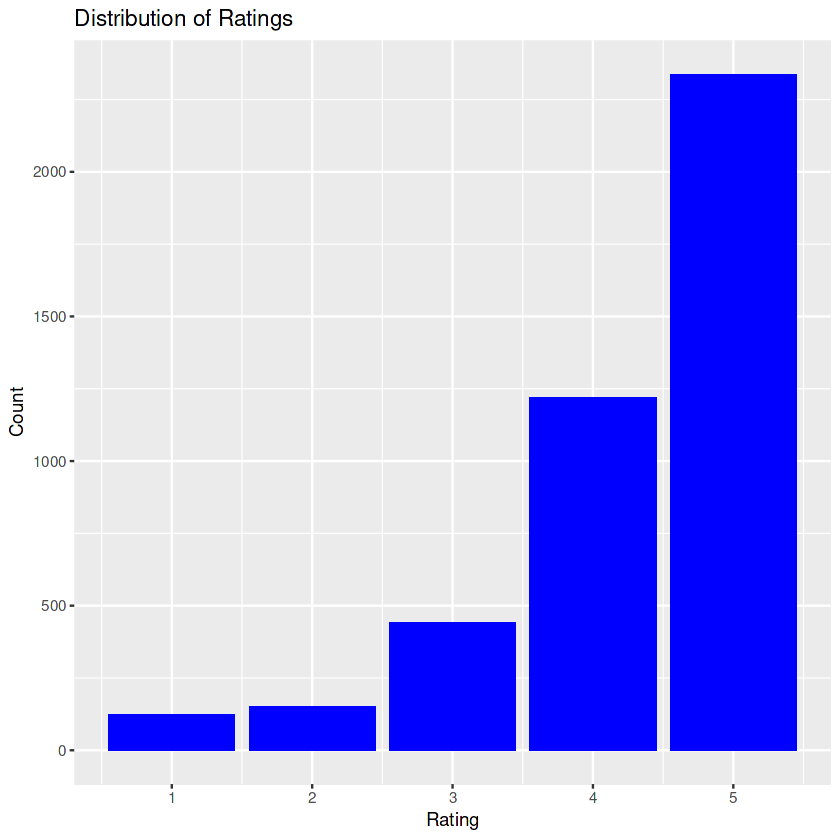

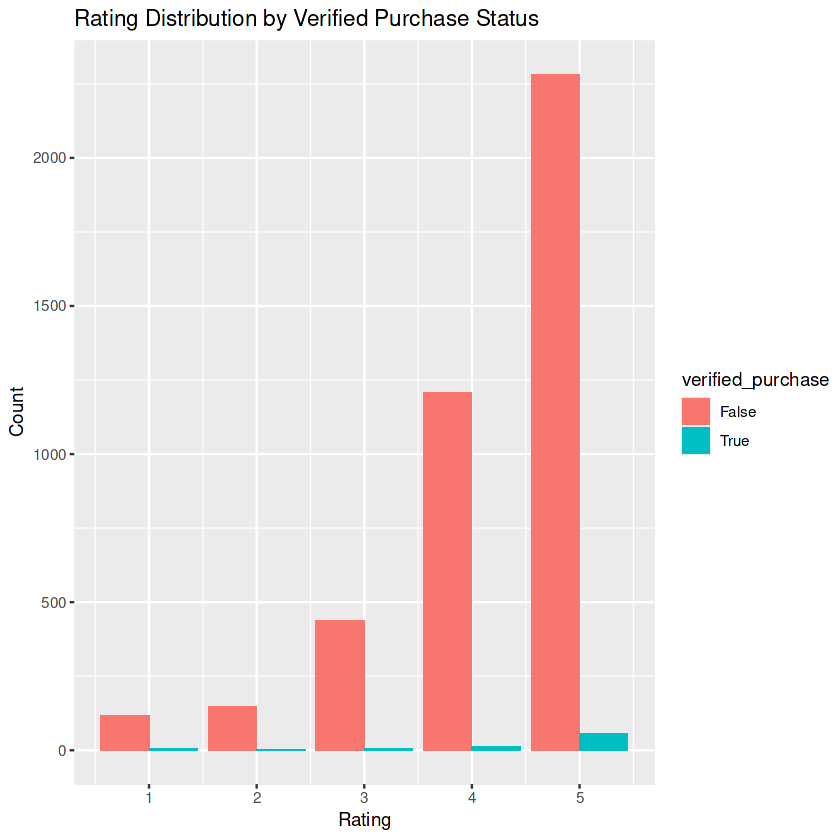

In [8]:
# Plotting the distribution of ratings
ggplot(data, aes(x = rating)) +
  geom_bar(fill = "blue") +
  labs(title = "Distribution of Ratings", x = "Rating", y = "Count")
# Plotting the distribution of ratings for verified purchases
ggplot(data, aes(x = rating, fill = verified_purchase)) +
  geom_bar(position = "dodge") +
  labs(title = "Rating Distribution by Verified Purchase Status", x = "Rating", y = "Count")


**From the first graph strong positive skew can be observed indicating the most users have given a rating of 5 for most of the products.**


**From the second graph we can observe that unverified purchases make a large proportion of the user ratings whereas the verified ratings make up the small proportion of ratings for each rating.**ngs

In [9]:
# Creating the utility matrix

# Picking only the columns which are necessary
utility_data <- data %>% select(user_id, asin, rating)

utility_matrix_df <- utility_data %>%
  pivot_wider(names_from = asin, values_from = rating)

row_names <- utility_matrix_df$user_id
utility_matrix <- as.matrix(utility_matrix_df[,-1])
rownames(utility_matrix) <- row_names

sparsity <- sum(is.na(utility_matrix)) / prod(dim(utility_matrix))
sparsity

# Creating sparse matrix from utility matrix
rating_matrix <- as(utility_matrix, "realRatingMatrix")

[1] 0.9902818

In [10]:
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:arules’:

    intersect, setdiff, union


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Problem 1

### User-based collaborative filtering: 3 points (2+1)

1. As part of the test run of the new business strategy, you are supposed to pick a user (consider the user with user_id:"AE2O2C43KTYO4LXXGZWJZLE67GBQ") and recommend 5 products based on other similar users.

Remember to exclude the product(s) purchased by this user.

2. Which similarity metric did you use? Why?

In [11]:
# Your code here
# Your code here
target_user_id <- "AE2O2C43KTYO4LXXGZWJZLE67GBQ"
purchased_products <- names(utility_matrix[target_user_id, 
                                           !is.na(utility_matrix[target_user_id, ])])

# Calculating the similarity scores
similarity_scores <- proxy::simil(utility_matrix, method = "cosine", by_rows = TRUE)
similarity_matrix <- as.matrix(similarity_scores)
rownames(similarity_matrix) <- rownames(utility_matrix)
colnames(similarity_matrix) <- rownames(utility_matrix)

top_similar_users <- similarity_matrix[target_user_id, -which(names(similarity_matrix[target_user_id, ]) == target_user_id)]
top_similar_users <- sort(top_similar_users, decreasing = TRUE)[1:5]
top_similar_user_ids <- names(top_similar_users)

purchased_products <- names(utility_matrix[target_user_id, 
                                           !is.na(utility_matrix[target_user_id, ])])

# Predicting the recommended products
recommended_products <- utility_matrix[top_similar_user_ids, ] %>%
  as.data.frame() %>%
  mutate(user = rownames(.)) %>%
  pivot_longer(cols = -user, names_to = "asin", values_to = "rating") %>%
  filter(!is.na(rating) & !(asin %in% purchased_products)) 

recommendation_summary <- recommended_products %>%
  group_by(asin) %>%
  summarise(
    avg_rating = mean(rating, na.rm = TRUE),
    count = n()
  ) %>%
  arrange(desc(avg_rating), desc(count)) %>%
  slice_head(n = 5)

print(recommendation_summary)

# A tibble: 5 × 3
  asin       avg_rating count
  <chr>           <dbl> <int>
1 B096RV991X          5     2
2 B098WFX6TY          5     2
3 B09VCSTX43          5     2
4 B00LTM7GSC          5     1
5 B01CO6B1FA          5     1


**Cosine Similarity: Why It Works Well in Our Case**

- **Adapts to Different Rating Styles:**  
Cosine similarity emphasizes the *angle* between user ratings rather than their magnitude. This ensures it captures rating patterns, regardless of whether a user tends to rate generously or strictly.

- **Ideal for Sparse Data:**  
With 99.03% of our data being sparse, cosine similarity efficiently leverages only the available ratings, making computations both faster and more precise.

- **Highlights Rating Patterns:**  
By focusing on the structure of user ratings rather than their absolute values, cosine similarity detects similar rating behaviors even across different scales.

- **Simple and Intuitive:**  
The similarity scores range from -1 to 1, making them straightforward to interpret and compare, while naturally accounting for rating biases without additional adjustments.

## Problem 2

### 1 point

Consider the same user as in the previous problem.

Let's assume this user decides to purchase the first product among the recommendations above. What rating is the user likely to give to this product?

In [12]:
# Your code here
first_recommended_product <- recommendation_summary$asin[1]

# Filtering the ratings only for that product
ratings_for_product <- recommended_products %>%
  filter(asin == first_recommended_product) %>%
  select(user, rating)
ratings_with_similarity <- ratings_for_product %>%
  left_join(data.frame(user = names(top_similar_users), similarity = top_similar_users), by = "user")

# Rating prediction
predicted_rating <- sum(ratings_with_similarity$rating * ratings_with_similarity$similarity) /
                    sum(ratings_with_similarity$similarity)

cat(predicted_rating, "\n")

5 


## Problem 3

### Item-based Collaborative Filtering: 2 points

Use the item-based method from the package "recommenderlab" to recommend top-5 products to the user "AE5IMGWRBJA7JQFBQTBK25HDYGVA".

In [13]:
# Your code here
rating_matrix <- as(utility_matrix, "realRatingMatrix")
item_based_model <- Recommender(rating_matrix, method = "IBCF")

target_user <- "AE5IMGWRBJA7JQFBQTBK25HDYGVA"

recommendations <- predict(item_based_model, rating_matrix[target_user, ], n = 5)
recommended_items <- as(recommendations, "list")[[1]]

cat("Top-5 recommended products for user", target_user, ":\n")
print(recommended_items)

Top-5 recommended products for user AE5IMGWRBJA7JQFBQTBK25HDYGVA :
[1] "B08RD257KT" "B0BCDSDSD1" "B0B28VNFB6" "B07VLBLNF3" "B08Q8MMGTB"


## Problem 4

### Long-tail problem: 2 points

1. Plot a graph of the products and their frequencies(in descending order of frequency). State your observations about the graph. 

2. Suggest 2 ways to overcome the long-tail problem of recommender systems.



List the links to the resources you referred to for your answer.

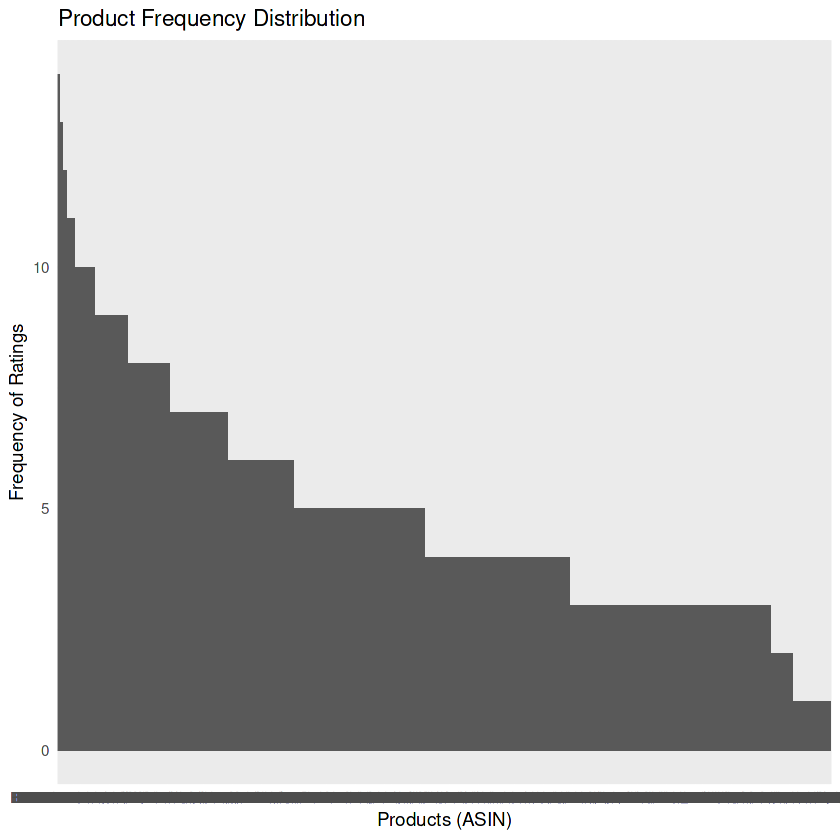

In [17]:
# Your code here
product_frequency <- colSums(!is.na(utility_matrix))

product_frequency_df <- data.frame(
  asin = names(product_frequency),
  frequency = product_frequency
) %>%
  arrange(desc(frequency))

ggplot(product_frequency_df, aes(x = reorder(asin, -frequency), y = frequency)) +
  geom_bar(stat = "identity") +
  labs(title = "Product Frequency Distribution",
       x = "Products (ASIN)",
       y = "Frequency of Ratings") +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank()) +
  theme_minimal()

Observations on the Graph
Long-Tail Distribution:
The graph illustrates a typical long-tail distribution where a small number of products (left side) have a high frequency of ratings, while the majority (right side) have very few ratings. This indicates that a limited set of popular products dominate user interactions.


Data Sparsity:
Most products receive very few ratings, highlighting the challenge of making personalized recommendations for less popular items due to insufficient user feedback.


Suggestions to Overcome the Long-Tail Problem:
Hybrid Recommendation Models:


Combine collaborative filtering (to leverage user-item interactions) with content-based filtering (to use product attributes like category or description). This ensures recommendations even for products with fewer ratings.
link: 'https://www.vldb.org/pvldb/vol5/p896_hongzhiyin_vldb2012.pdf'

Matrix Factorization:
Matrix factorization techniques, such as Singular Value Decomposition (SVD) or Non-negative Matrix Factorization (NMF), are highly effective for addressing sparse data. These methods identify hidden patterns by capturing latent relationships between users and items, enabling more accurate recommendations for products in the long tail
link:  'https://ar5iv.labs.arxiv.org/html/2307.11650'.

## Problem 5

### 1 point

Do you see any shortcomings of Collaborative Filtering due to the dataset or other factors? What modifications would you introduce to achieve better results?

*Your answer here*

**Shortcomings of Collaborative Filtering:**

Sparsity:
Collaborative filtering struggles with sparse datasets, where only a small fraction of users interact with a small fraction of items. This lack of overlap in user-item interactions makes it challenging to find similar users or items, especially in item-based CF.

Cold Start Problem:
New users and items pose significant challenges. Without prior interactions, the system cannot generate meaningful recommendations for new users. Similarly, new items lack sufficient interaction data, leaving them unrecommended until they accumulate ratings or usage data (a common issue with long-tail items).

Popularity Bias:
CF tends to favor popular items due to their higher interaction counts, often overshadowing niche or less-known items. This can reduce recommendation diversity and limit the discovery of lesser-known products.

Scalability:
As the dataset grows, the number of possible user or item comparisons increases exponentially. This is particularly problematic in user-based CF, where similarity computations become computationally intensive for large user bases.

Limited Context Awareness:
CF does not consider contextual factors such as time, location, or seasonality, which can be critical for specific recommendation scenarios, like suggesting seasonal products or location-specific items.

**Modifications to Improve Results:**

Hybrid Recommender Systems:
Combine collaborative filtering with content-based filtering. Content-based methods utilize item attributes (e.g., categories or descriptions) to recommend items, addressing issues like sparsity and the cold start problem by leveraging auxiliary information.

Matrix Factorization:
Apply techniques such as Singular Value Decomposition (SVD) or Alternating Least Squares (ALS) to decompose the user-item interaction matrix into latent factors. These methods reduce dimensionality and uncover hidden relationships, improving recommendation quality in sparse datasets.

Regularization to Reduce Popularity Bias:
Incorporate regularization techniques to balance recommendations, favoring both popular and less-interacted items. Modifying algorithms to give weight to niche products can mitigate over-recommendation of popular items.

Diversity-Promoting Techniques:
Enhance recommendation diversity by introducing diversity scores or exploration-based methods like multi-armed bandits. These approaches help highlight niche items that align with users' preferences, ensuring a broader variety of suggestions.

Context-Aware Recommendations:
Incorporate contextual factors such as time, location, or seasonality into the recommendation process. Techniques like time-aware CF or contextual bandits can improve relevance and personalization by adapting recommendations to specific situations.

Leverage Implicit Feedback:
Use implicit feedback signals, such as clicks, page views, or dwell time, in addition to explicit ratings. These signals enrich user profiles and enhance recommendation accuracy, especially when explicit feedback is limited.

Graph-Based Approaches:
For highly sparse datasets, consider graph-based models, which can capture user-item relationships and similarities even when direct interaction data is limited. Graph neural networks and random walks are effective in such scenarios.

Preprocessing and Data Imputation:
Handle missing data by using imputation techniques or auxiliary information about users and items to estimate missing interactions. This improves similarity calculations and strengthens recommendation accuracy.


Kudos on completing the task! Hope you could learn a few new things along the way.

Here's an interesting approach that uses LLMs and the FAISS library to create a movie recommender system in python: https://www.youtube.com/watch?v=epidA1fBFtI&t=122s

Do explore the above resource as it might have a bunch of new techniques in store for you.